# Prepare the setup

In [9]:
# Import packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [10]:
# Load the dataset
df = pd.read_csv("../data/new_training_dataset.csv")

This dataset was already in csv format, so we imported it directly. To prepare it we removed some columns we didn't need for the model development. Most of those were categorical type which we didn't need or were already covered with other similar columns. 


# Initial Exploration

In [11]:
# See the first 5 rows
df.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


In [12]:
# Print information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   TLD                         235795 non-null  object 
 4   URLSimilarityIndex          235795 non-null  float64
 5   CharContinuationRate        235795 non-null  float64
 6   TLDLegitimateProb           235795 non-null  float64
 7   URLCharProb                 235795 non-null  float64
 8   TLDLength                   235795 non-null  int64  
 9   NoOfSubDomain               235795 non-null  int64  
 10  HasObfuscation              235795 non-null  int64  
 11  NoOfObfuscatedChar          235795 non-null  int64  
 12  ObfuscationRatio            235795 non-null  float64
 13  NoOfLettersInU

As we can see, all of our features are now int or float.

In [ ]:
df.describe()

We can see basic statistical information such as count, mean, standard deviation, minimum value, the quartiles, and maximum value.

In [ ]:
# Check for null values
df.isna().sum()

As with the other dataset, we luckily have no NAs.

In [ ]:
# Check for duplicates
df.duplicated().sum()

We don't have a lot of duplicates, they only account for around 0.4% of our dataset, so we're going to drop them.

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

np.int64(0)

The values were dropped successfully.
## Check for class imbalance

In [13]:
# Check target class
df['label'].value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

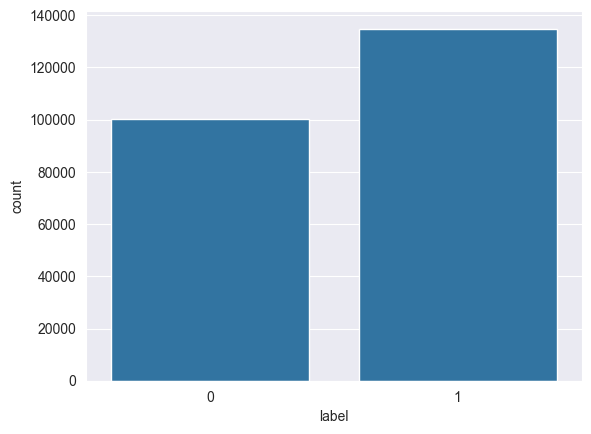

In [21]:
# Class distribution plot
sns.countplot(x='label', data=df)

There is not a big difference between the two results, so we go to the next step without balancing.
## More visualisations
